# **Data Cleaning**

Scikit Learn merupakan library pada python yang digunakan untuk machine learning dan data science. Salah satu library yang selalu menjadi favorit dan komunitasnya sangat kuat. Scikit-learn sendiri tidak hanya untuk analytics saja, namun juga untuk pre-processing, feature selection, dan proses analysis lainnya.

Data cleaning penting sebab proses ini meningkatkan kualitas data yang juga berpengaruh terhadap produktivitas kerja secara keseluruhan. 

Data yang tidak akurat bisa berpengaruh buruk terhadap akurasi dan performa model. Dengan cara data dan informasi yang tidak dibutuhkan sehingga kita akan mendapatkan data yang berkualitas. 

Data yang akurat dan berkualitas akan berpengaruh positif terhadap proses pengambilan keputusan. 

Pernahkah mendengar ungkapan “Garbage In - Garbage Out?” Dalam konteks machine learning,  jika input yang Anda masukkan itu buruk, sudah barang tentu hasil olah data Anda pun akan buruk. 

1. Konsistensi Format  
Sebuah variabel mungkin tidak memiliki format yang konsisten seperti penulisan tanggal 10-Okt-2020 versus 10/10/20. Format jam yang berbeda seperti 17.10 versus 5.10 pm. Penulisan uang seperti 17000 versus Rp 17.000. Data dengan format berbeda tidak akan bisa diolah oleh model machine learning. Solusinya, format data harus disamakan dan dibuat konsisten terlebih dahulu.

2. Skala Data  
Jika sebuah variabel memiliki jangka dari 1 sampai 100, pastikan tidak ada data yang lebih dari 100. Untuk data numerik, jika sebuah variabel merupakan bilangan positif, maka pastikan tidak ada bilangan negatif.

3. Duplikasi data  
Data yang memiliki duplikat akan mempengaruhi model machine learning, apalagi jika data duplikat tersebut besar jumlahnya. Untuk itu kita harus memastikan tidak ada data yang terduplikasi.

4. Missing Value  
Missing value terjadi ketika data dari sebuah record tidak lengkap. Missing value sangat mempengaruhi performa model machine learning. Ada 2 (dua) opsi untuk mengatasi missing value, yaitu menghilangkan data missing value atau mengganti nilai yang hilang dengan nilai lain, seperti rata-rata dari kolom tersebut (mean) atau nilai yang paling sering muncul (modus), atau nilai tengah (median).

5. Skewness Distribution  
Skewness adalah kondisi di mana dataset cenderung memiliki distribusi data yang tidak seimbang. Skewness akan mempengaruhi data dengan menciptakan bias terhadap model. Apa itu bias? Sebuah model cenderung memprediksi sesuatu karena ia lebih sering mempelajari hal tersebut. Misalkan ada sebuah model untuk pengenalan buah di mana jumlah jeruk 92 buah dan apel 8 buah. Distribusi yang tidak imbang ini akan mengakibatkan model lebih cenderung memprediksi jeruk daripada apel. 

Cara paling simpel untuk mengatasi skewness adalah dengan menyamakan proporsi kelas mayoritas dengan kelas minoritas. Untuk teknik lebih lanjut dalam mengatasi skewness atau imbalance data, Anda bisa membacanya di [tautan](https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data) ini.

Jika Anda ingin membaca lebih lanjut tentang proses data cleaning, silakan buka tautan [ini](https://towardsdatascience.com/the-ultimate-guide-to-data-cleaning-3969843991d4) atau tautan [berikut](https://www.kdnuggets.com/2019/06/7-steps-mastering-data-preparation-python.html).

# **Data Preparation dengan Normalization dan Standardization**

## **Mengatasi Missing Value**

In [ ]:
import pandas as pd
import numpy as np
import io
import pandas_profiling

In [ ]:
data1 = pd.read_csv('/content/retail_raw_reduced_data_quality.csv')
data1

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,17/10/2019,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10.0,740000.0
1,1706815,24/10/2019,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2.0,604000.0
2,1710718,03/11/2019,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8.0,1045000.0
3,1683592,19/08/2019,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4.0,205000.0
4,1702573,16/10/2019,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2.0,NaN
...,...,...,...,...,...,...,...,...,...
4995,1724011,01/12/2019,12838,Tangerang,Banten,P3047,BRAND_R,2.0,450000.0
4996,1676302,28/07/2019,13833,Bogor,Jawa Barat,P0760,BRAND_C,3.0,1465000.0
4997,1706071,23/10/2019,16332,Jakarta Timur,DKI Jakarta,P1681,BRAND_H,4.0,747000.0
4998,1703620,17/10/2019,13055,Jakarta Barat,DKI Jakarta,P0757,BRAND_C,8.0,695000.0


In [ ]:
# Check kolom yang memiliki missing data
print('Check kolom yang memiliki missing data:')
print(data1.isnull().any())

Check kolom yang memiliki missing data:
order_id       False
order_date     False
customer_id    False
city            True
province        True
product_id      True
brand          False
quantity        True
item_price      True
dtype: bool


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   order_id     5000 non-null   int64  
 1   order_date   5000 non-null   object 
 2   customer_id  5000 non-null   int64  
 3   city         4984 non-null   object 
 4   province     4988 non-null   object 
 5   product_id   4989 non-null   object 
 6   brand        5000 non-null   object 
 7   quantity     4986 non-null   float64
 8   item_price   4987 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 351.7+ KB


### **Drop Missing Value**

In [ ]:
# Check ukuran (baris dan kolom) sebelum data duplikasi dibuang
print('Shape awal: ', data1.shape)

Shape awal:  (5000, 9)


In [ ]:
# Drop missing value
data1 = data1.dropna()
print('\nDrop missing value:')
print(data1)


Drop missing value:
      order_id  order_date  customer_id             city     province  \
0      1703458  17/10/2019        14004  Jakarta Selatan  DKI Jakarta   
1      1706815  24/10/2019        17220  Jakarta Selatan  DKI Jakarta   
2      1710718  03/11/2019        16518    Jakarta Utara  DKI Jakarta   
3      1683592  19/08/2019        16364    Jakarta Barat  DKI Jakarta   
5      1672906  16/07/2019        12748    Jakarta Utara  DKI Jakarta   
...        ...         ...          ...              ...          ...   
4995   1724011  01/12/2019        12838        Tangerang       Banten   
4996   1676302  28/07/2019        13833            Bogor   Jawa Barat   
4997   1706071  23/10/2019        16332    Jakarta Timur  DKI Jakarta   
4998   1703620  17/10/2019        13055    Jakarta Barat  DKI Jakarta   
4999   1720036  24/11/2019        17609    Jakarta Pusat  DKI Jakarta   

     product_id    brand  quantity  item_price  
0         P1910  BRAND_J      10.0    740000.0  
1   

In [ ]:
# Check ukuran (baris dan kolom) sebelum data duplikasi dibuang
print('Shape akhir: ', data1.shape)

Shape akhir:  (4935, 9)


In [ ]:
# Check kolom yang memiliki missing data
print('Check kolom yang memiliki missing data:')
print(data1.isnull().any())

Check kolom yang memiliki missing data:
order_id       False
order_date     False
customer_id    False
city           False
province       False
product_id     False
brand          False
quantity       False
item_price     False
dtype: bool


### **Mengisi Dengan Mean**

In [ ]:
data = pd.read_csv('/content/retail_raw_reduced_data_quality.csv')
data.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,17/10/2019,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10.0,740000.0
1,1706815,24/10/2019,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2.0,604000.0
2,1710718,03/11/2019,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8.0,1045000.0
3,1683592,19/08/2019,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4.0,205000.0
4,1702573,16/10/2019,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2.0,NaN


In [ ]:
# Fungsi mean sendiri berfungsi untuk menampilkan  nilai mean (rata-rata) dari setiap kolom.
print(data.mean())

order_id       1.707214e+06
customer_id    1.547483e+04
quantity       1.142399e+01
item_price     9.337427e+05
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
# Filling the missing value (imputasi)
data=data.fillna(data.mean())
print("Dataset yang sudah diproses Handling Missing Values dengan Mean :")
print(data.head(10))

Dataset yang sudah diproses Handling Missing Values dengan Mean :
   order_id  order_date  customer_id             city     province product_id  \
0   1703458  17/10/2019        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  24/10/2019        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  03/11/2019        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  19/08/2019        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  16/10/2019        15696    Jakarta Timur  DKI Jakarta      P2968   
5   1672906  16/07/2019        12748    Jakarta Utara  DKI Jakarta      P0710   
6   1711399  04/11/2019        16791    Jakarta Barat  DKI Jakarta      P0860   
7   1695367  26/09/2019        13069        Surakarta  Jawa Tengah      P3342   
8   1741846  30/12/2019        16873    Jakarta Barat  DKI Jakarta      P3203   
9   1720189  24/11/2019        14723        Tangerang       Banten      P1701   

     brand  quantity    item_price  
0  BR

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
# Check kolom yang memiliki missing data
print('Check kolom yang memiliki missing data:')
print(data.isnull().any())

Check kolom yang memiliki missing data:
order_id       False
order_date     False
customer_id    False
city            True
province        True
product_id      True
brand          False
quantity       False
item_price     False
dtype: bool


### **Mengisi dengan median**

Median digunakan untuk data-data yang memiliki sifat outlier yang kuat. 

Karena Median merupakan nilai tengah yang bukan hasil dari perhitungan yang melibatkan data outlier. Pada beberapa kasus, data outlier dianggap mengganggu dan sering dianggap noisy karena bisa mempengaruhi distribusi kelas dan mengganggu analisa pada klasterisasi (clustering).

In [ ]:
data2 = pd.read_csv('/content/retail_raw_reduced_data_quality.csv')
data2

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,17/10/2019,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10.0,740000.0
1,1706815,24/10/2019,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2.0,604000.0
2,1710718,03/11/2019,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8.0,1045000.0
3,1683592,19/08/2019,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4.0,205000.0
4,1702573,16/10/2019,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2.0,NaN
...,...,...,...,...,...,...,...,...,...
4995,1724011,01/12/2019,12838,Tangerang,Banten,P3047,BRAND_R,2.0,450000.0
4996,1676302,28/07/2019,13833,Bogor,Jawa Barat,P0760,BRAND_C,3.0,1465000.0
4997,1706071,23/10/2019,16332,Jakarta Timur,DKI Jakarta,P1681,BRAND_H,4.0,747000.0
4998,1703620,17/10/2019,13055,Jakarta Barat,DKI Jakarta,P0757,BRAND_C,8.0,695000.0


In [ ]:
# Fungsi mean sendiri berfungsi untuk menampilkan  nilai mean (rata-rata) dari setiap kolom.
print(data2.median())

order_id       1708448.5
customer_id      15492.5
quantity             5.0
item_price      604000.0
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


In [ ]:
# Filling the missing value (imputasi)
data2=data2.fillna(data.median())
print("Dataset yang sudah diproses Handling Missing Values dengan Mean :")
print(data2.head(10))

Dataset yang sudah diproses Handling Missing Values dengan Mean :
   order_id  order_date  customer_id             city     province product_id  \
0   1703458  17/10/2019        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  24/10/2019        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  03/11/2019        16518    Jakarta Utara  DKI Jakarta      P0908   
3   1683592  19/08/2019        16364    Jakarta Barat  DKI Jakarta      P0128   
4   1702573  16/10/2019        15696    Jakarta Timur  DKI Jakarta      P2968   
5   1672906  16/07/2019        12748    Jakarta Utara  DKI Jakarta      P0710   
6   1711399  04/11/2019        16791    Jakarta Barat  DKI Jakarta      P0860   
7   1695367  26/09/2019        13069        Surakarta  Jawa Tengah      P3342   
8   1741846  30/12/2019        16873    Jakarta Barat  DKI Jakarta      P3203   
9   1720189  24/11/2019        14723        Tangerang       Banten      P1701   

     brand  quantity  item_price  
0  BRAN

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


## **Duplicate**

Duplikasi data merupakan data dengan kondisi pada row-row tertentu memiliki kesamaan data di seluruh kolomnya.

Untuk mengecek duplikasi data:  
> nama_dataframe.duplicated(subset=None)  

Syntax untuk membuang duplikasi:
> nama_dataframe.drop_duplicates()

In [ ]:
retail_raw = pd.read_csv('/content/retail_raw_reduced_data_quality.csv')
retail_raw.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,17/10/2019,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10.0,740000.0
1,1706815,24/10/2019,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2.0,604000.0
2,1710718,03/11/2019,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8.0,1045000.0
3,1683592,19/08/2019,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4.0,205000.0
4,1702573,16/10/2019,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2.0,NaN


In [ ]:
# mengetahui adanya data duplikat
retail_raw.duplicated().any()

True

In [ ]:
retail_raw.duplicated().sum()

7

In [ ]:
# Check ukuran (baris dan kolom) sebelum data duplikasi dibuang
print('Shape awal: ', retail_raw.shape)

Shape awal:  (5000, 9)


In [ ]:
# Buang data yang terduplikasi
retail_raw.drop_duplicates(inplace=True)

In [ ]:
# Check ukuran (baris dan kolom) setelah data duplikasi dibuang
print('Shape akhir: ', retail_raw.shape)

Shape akhir:  (4993, 9)


## **Outliers**

Outlier adalah sebuah nilai yang jauh berbeda dari kumpulan nilai lainnya dan dapat mengacaukan hasil dari sebuah analisis statistik.

Cara treatment terhadap outliers antara lain:

- Remove the outliers (dibuang)
- Filling the missing value (imputasi)
- Capping
- Prediction

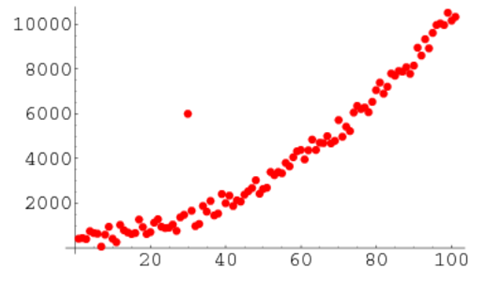

Pada umumnya, outliers dapat ditentukan dengan metric IQR (interquartile range).

Rumus dasar dari IQR: Q3 - Q1, dan data suatu observasi dapat dikatakan outliers jika memenuhi kedua syarat dibawah ini:

> Q1 - 1.5 * IQR  
> Q3 + 1.5 * IQR



Syntax di Python :   
> Q1 = nama_dataframe.quantile(0.25)  
> Q3 = nama_dataframe.quantile(0.75)  
> IQR = Q3 - Q1

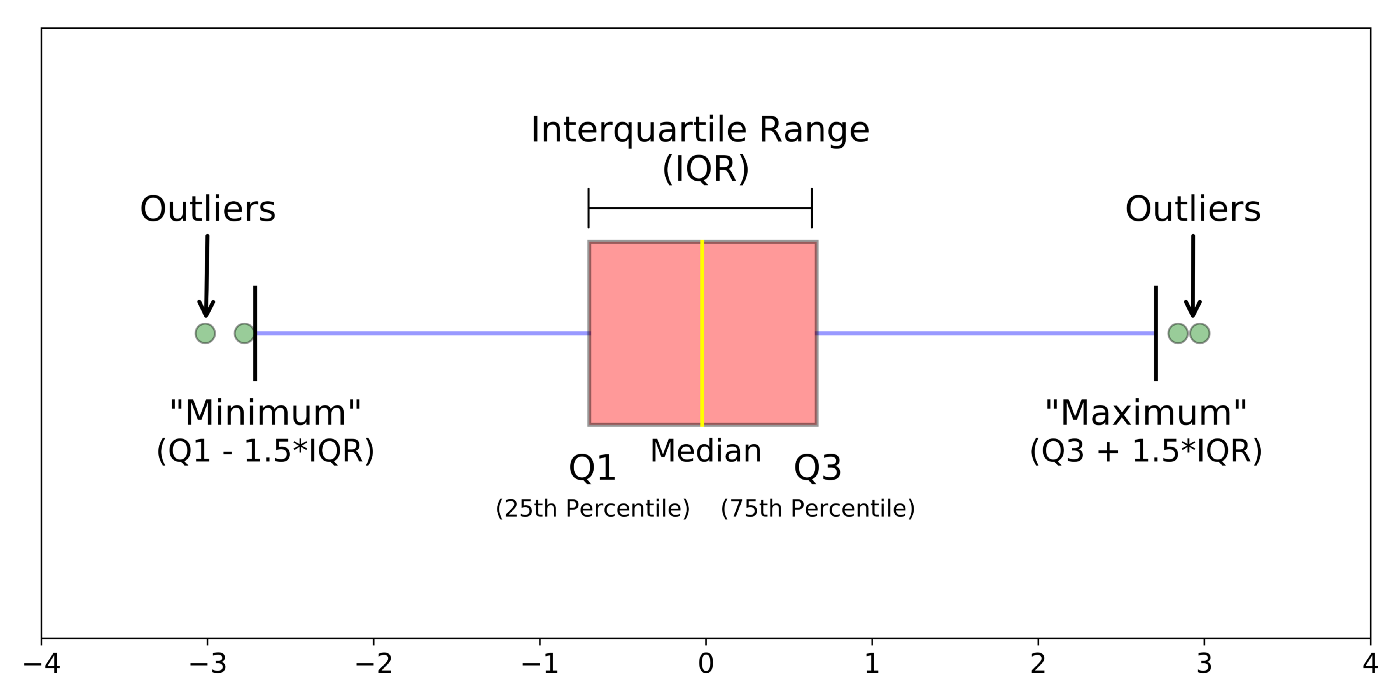

In [ ]:
# Check ukuran (baris dan kolom) sebelum data yang outliers dibuang
print('Shape awal: ', retail_raw.shape)

Shape awal:  (4993, 9)


In [ ]:
# Q1, Q3, dan IQR
Q1 = retail_raw['quantity'].quantile(0.25)
Q3 = retail_raw['quantity'].quantile(0.75)
IQR = Q3 - Q1

In [ ]:
# Removing outliers
retail_raw = retail_raw[~((retail_raw['quantity'] < (Q1-1.5*IQR)) | (retail_raw['quantity'] > (Q3+1.5*IQR)))]


In [ ]:
# Check ukuran (baris dan kolom) setelah data yang outliers dibuang
print('Shape akhir: ', retail_raw.shape)

Shape akhir:  (4692, 9)


## **Standardization**

Standardization adalah proses konversi nilai-nilai dari suatu fitur sehingga nilai-nilai tersebut memiliki skala yang sama.

Z score adalah metode paling populer untuk standardisasi di mana setiap nilai pada sebuah atribut numerik akan dikurangi dengan rata-rata dan dibagi dengan standar deviasi dari seluruh nilai pada sebuah kolom atribut.



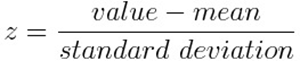

In [ ]:
retail_raw = pd.read_csv('/content/retail_raw_reduced_data_quality.csv')
retail_raw.head()

,order_id,order_date,customer_id,city,province,product_id,brand,quantity,item_price
0,1703458,17/10/2019,14004,Jakarta Selatan,DKI Jakarta,P1910,BRAND_J,10.0,740000.0
1,1706815,24/10/2019,17220,Jakarta Selatan,DKI Jakarta,P2934,BRAND_R,2.0,604000.0
2,1710718,03/11/2019,16518,Jakarta Utara,DKI Jakarta,P0908,BRAND_C,8.0,1045000.0
3,1683592,19/08/2019,16364,Jakarta Barat,DKI Jakarta,P0128,BRAND_A,4.0,205000.0
4,1702573,16/10/2019,15696,Jakarta Timur,DKI Jakarta,P2968,BRAND_R,2.0,NaN


In [ ]:
from sklearn import preprocessing

# membuat data dummy sesuai dengan tabel
data = [[740000, 10], [604000, 2], [1045000, 8], [205000, 40]]

In [ ]:
scaler = preprocessing.StandardScaler().fit(data)

Fungsi fit memiliki fungsi untuk menghitung rata-rata dan deviasi standar dari setiap kolom atribut untuk kemudian dipakai pada fungsi transform.

In [ ]:
data = scaler.transform(data)
data

array([[ 0.30321252, -0.33942212],
       [-0.14746401, -0.8824975 ],
       [ 1.31392094, -0.47519096],
       [-1.46966945,  1.69711058]])

Fungsi transform untuk mengaplikasikan standard scaler pada data.

Untuk informasi lebih detail tentang standardization, silakan kunjungi tautan [berikut](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

## **Normalization**

Tujuan dari normalisasi adalah mengubah nilai-nilai dari sebuah fitur ke dalam skala yang sama. 

Ada berbagai macam metode normalisasi, seperti MinMax, Zscore, Decimal Scaling, Sigmoid, dan Softmax.

### **MinMax** 

Salah satu contoh dari normalization adalah min-max scaling di mana nilai-nilai dipetakan ke dalam skala 0 sampai 1. SKLearn menyediakan library untuk normalization

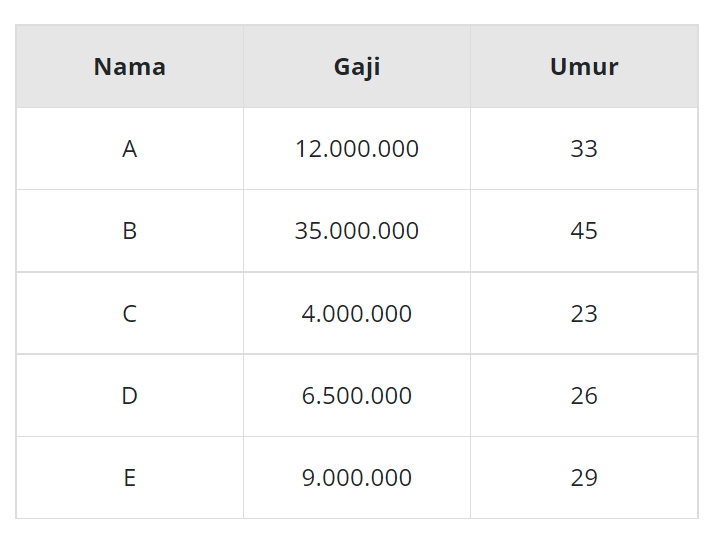

In [ ]:
from sklearn.preprocessing import MinMaxScaler
data = [[12000000, 33], [35000000, 45], [4000000, 23], [6500000, 26], [9000000, 29]]

In [ ]:
scaler = MinMaxScaler()
scaler.fit(data)

MinMaxScaler()

Fungsi fit() dari objek MinMaxSclaer adalah fungsi untuk menghitung nilai minimum dan maksimum pada tiap kolom.

In [ ]:
print(scaler.transform(data))

[[0.25806452 0.45454545]
 [1.         1.        ]
 [0.         0.        ]
 [0.08064516 0.13636364]
 [0.16129032 0.27272727]]


fungsi transform() yang akan mengaplikasikan scaler pada data

Untuk informasi lebih detail tentang Min Max Scaler, silakan kunjungi tautan [berikut](https://scikit-learn.org/0.16/modules/generated/sklearn.preprocessing.MinMaxScaler.html).

# **Training Set dan Test Set**

Train_test_split memiliki parameter x yaitu atribut dari dataset, y yaitu target dari dataset, dan test_size yaitu persentase test set dari dataset utuh.

In [ ]:
from sklearn.model_selection import train_test_split
 
X_data = range(10)
y_data = range(10)
 
print("random_state ditentukan")
for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 42)
    print(y_test)
 
 
print("random_state tidak ditentukan")
for i in range(3):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = None)
    print(y_test)

random_state ditentukan
[8, 1, 5]
[8, 1, 5]
[8, 1, 5]
random_state tidak ditentukan
[7, 9, 5]
[9, 6, 5]
[2, 1, 8]


Train_test_split mengembalikan 4 nilai yaitu, atribut dari train set, atribut dari test set, target dari train set, dan target dari test set.

In [ ]:
import sklearn
from sklearn import datasets

In [ ]:
# load iris dataset
iris = pd.read_csv('/content/retail_raw_reduced_data_quality.csv')

In [ ]:
# pisahkan atribut dan label pada iris dataset
x=iris.drop(['order_id'],axis=1)
y=iris['order_id']

In [ ]:
from sklearn.model_selection import train_test_split
 
# membagi dataset menjadi training dan testing 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [ ]:
print(f'Total # of sample in whole dataset: {len(iris)}')
print(f'Total # of sample in train dataset: {len(x_train)}')
print(f'Total # of sample in test dataset: {len(x_test)}')
print(f'Total # of sample in train dataset: {len(y_train)}')
print(f'Total # of sample in test dataset: {len(y_test)}')

Total # of sample in whole dataset: 5000
Total # of sample in train dataset: 3500
Total # of sample in test dataset: 1500
Total # of sample in train dataset: 3500
Total # of sample in test dataset: 1500
